## 🧩 Introduction to Post-Hoc Test

After performing a One-Way ANOVA, if we find that there is a significant difference between group means (that is, we reject H₀), we still don’t know **which specific groups** differ from each other.  
To find that, we perform a **Post-Hoc Test** — a follow-up analysis that compares every possible pair of groups to identify where the difference actually lies.


## 🎯 Based on the Previous Example

As we observed earlier in our One-Way ANOVA analysis on the Titanic dataset, **H₁ had won**, meaning there was a significant difference in the average age among different passenger classes.  

Now, in this section, we will perform a **Post-Hoc test** (like Tukey’s HSD) to find out **which specific passenger classes** have different average ages.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = sns.load_dataset("titanic")

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data = data.dropna()

In [10]:
from scipy.stats import t
def two_sample_t(sample_1, sample_2):
    neumerator = (sample_1.mean() - sample_2.mean())
    denumerator = np.sqrt(((sample_1.var() / len(sample_1)) + (sample_2.var() / len(sample_2))))
    t_stat = neumerator / denumerator
    p_value = 2 * (1 - t.cdf(abs(t_stat), df(sample_1, sample_2)))
    return p_value
    
    
    
def df(sample_1, sample_2):
    neumerator = ((sample_1.var() / len(sample_1)) + (sample_2.var() / len(sample_2))) ** 2
    a = (((sample_1.var() / len(sample_1)) ** 2) / (len(sample_1) - 1))
    b = (((sample_2.var() / len(sample_2)) ** 2) / (len(sample_2) - 1))
    denumerator = a / b
    df = neumerator / denumerator
    return df

## 🔒 Bonferroni Test

The **Bonferroni Test** is a post-hoc test used after ANOVA when we want to control the chances of making a **Type I error** (false positive).  
It adjusts the significance level by dividing it by the number of comparisons being made.

This makes the test **more conservative**, meaning it reduces the risk of finding a difference by chance — but it can also slightly reduce statistical power.

Use the Bonferroni test when you need **strict confidence** in your results or when performing **multiple pairwise comparisons**.


In [ ]:
for i ,j in [(1, 2), (1, 3), (2, 3)]:
    print(i, j)
    print(two_sample_t(data[data['pclass'] == i]['age'], data[data['pclass'] == j]['age']))
    
# Checking which class has the most different (distant) mean age
# From the results, we can see that the 1st class has a much higher mean age
# compared to the 2nd and 3rd classes.
# This indicates that older passengers mostly traveled in 1st class,
# while younger passengers were more common in lower classes.

1 2
0.004745042333746952
1 3
0.00013723468891013724
2 3
0.4701043002540839


## 🧠 Tukey’s HSD (Honestly Significant Difference) Test

The **Tukey’s HSD Test** is a post-hoc test performed after a significant One-Way ANOVA result.  
It compares **all possible pairs of group means** to find which specific groups differ, while controlling for the overall Type I error rate.

Tukey’s test is considered **less conservative** than the Bonferroni test — meaning it’s slightly more powerful and can detect more true differences,  
but still keeps the overall error rate under control.

It works best when:
- The groups have **equal sample sizes**, and  
- The variances across groups are **approximately equal**.




 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -12.2774 0.0078 -21.8404 -2.7144   True
     1      3 -16.5441 0.0025 -28.0848 -5.0034   True
     2      3  -4.2667 0.7649 -18.7127 10.1794  False
-----------------------------------------------------


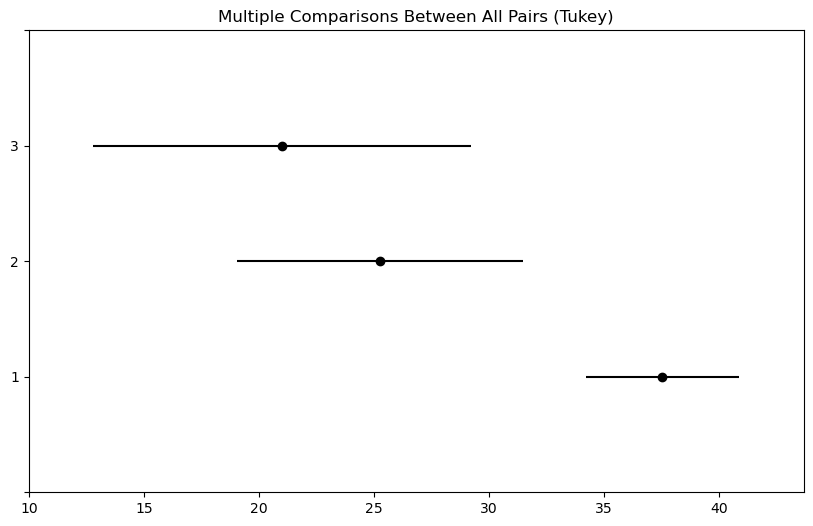

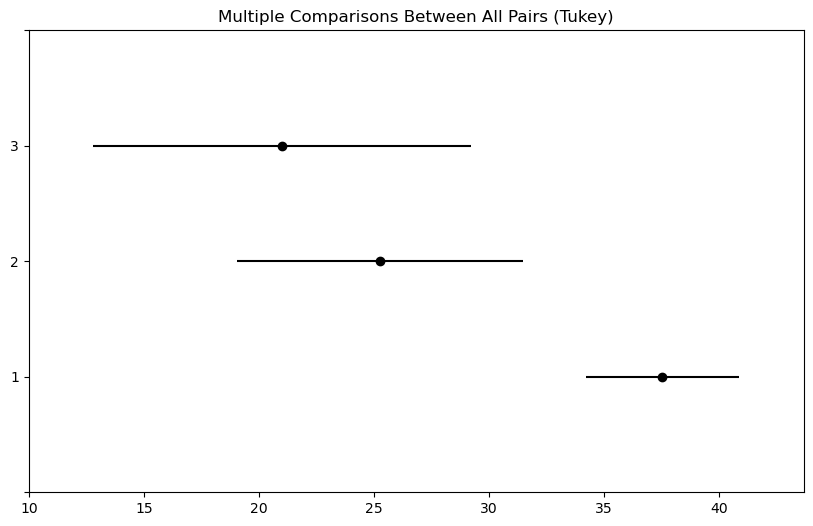

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
result = pairwise_tukeyhsd(endog=data['age'], groups=data['pclass'],alpha=0.05)
print(result)
result.plot_simultaneous()